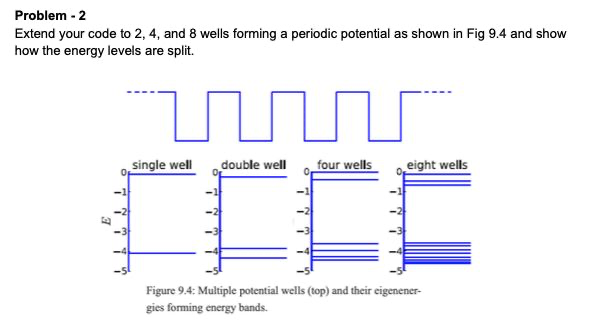

In [2]:
import numpy as np
import matplotlib.pyplot as plt #Plotting
import scienceplots
plt.style.use(['science', 'notebook', 'grid']) # To make plotting nice.

In [3]:
# Runge-Kutta 4th order method for solving DE
def rk4_step(f, y, x, dx, E):  # f = dy/dx
    k1 = dx * f(y, x, E)
    k2 = dx * f(y + 0.5 * k1, x + 0.5 * dx, E)
    k3 = dx * f(y + 0.5 * k2, x + 0.5 * dx, E)
    k4 = dx * f(y + k3, x + dx, E)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Schrödinger equation as a system of first-order ODEs(Coupled DE)
def schrodinger(y, x, E):
    psi, phi = y  # psi = wavefunction, phi = dpsi/dx
    dpsi_dx = phi
    dphi_dx = 2 * m / hbar**2 * (potential(x) - E) * psi
    return np.array([dpsi_dx, dphi_dx])

# Shooting method to find energy eigenvalues
def shoot(E, x_range, dx):
    x = np.arange(x_range[0], x_range[1], dx)
    y = np.array([0.0, 1.0])  # Initial conditions: psi(0) = 0, psi'(0) = 1
    
    for xi in x[1:]:
        y = rk4_step(schrodinger, y, xi, dx, E)
    
    return y[0]  # Return psi at the boundary

# Find eigenvalues using bisection method
def find_eigenvalue(E1, E2, tol, x_range, dx):
    psi1 = shoot(E1, x_range, dx)
    psi2 = shoot(E2, x_range, dx)
    
    while abs(E2 - E1) > tol:
        Emid = (E1 + E2) / 2
        psimid = shoot(Emid, x_range, dx)
        
        if psi1 * psimid < 0:
            E2, psi2 = Emid, psimid
        else:
            E1, psi1 = Emid, psimid
    
    return (E1 + E2) / 2
#Integration by Trapezoidal method
def integrate(y, x): # y is an array
    h = x[1] - x[0]
    return 0.5*h*(y[0]+y[-1]+2*sum(y[1:-1]))

# Single Well

In [4]:
# Constants
hbar = 1  # Reduced Planck's constant (in atomic units)
m = 1     # Mass of the particle (in atomic units)

a = 0.5; Vo = 6

# Define the potential function
def potential(x):
    if abs(x) <= a:
        return -Vo
    else: return 0


In [5]:
# Parameters
x_range = (-4, 4)  # Range for x
dx = 0.001          # Step size
En = []

In [6]:
E1, E2 = -3, -6 # Initial energy guesses

eigen_energy = find_eigenvalue(E1, E2, 1e-6, x_range, dx)
print(f"Eigenvalue found: {eigen_energy:.6f}")

Eigenvalue found: -4.103601


In [7]:
E1, E2 = 0, -3  # Initial energy guesses

eigen_energy = find_eigenvalue(E1, E2, 1e-6, x_range, dx)
print(f"Eigenvalue found: {eigen_energy:.6f}")

Eigenvalue found: -0.108531


In [17]:
En = [-4.103601, -0.108531]

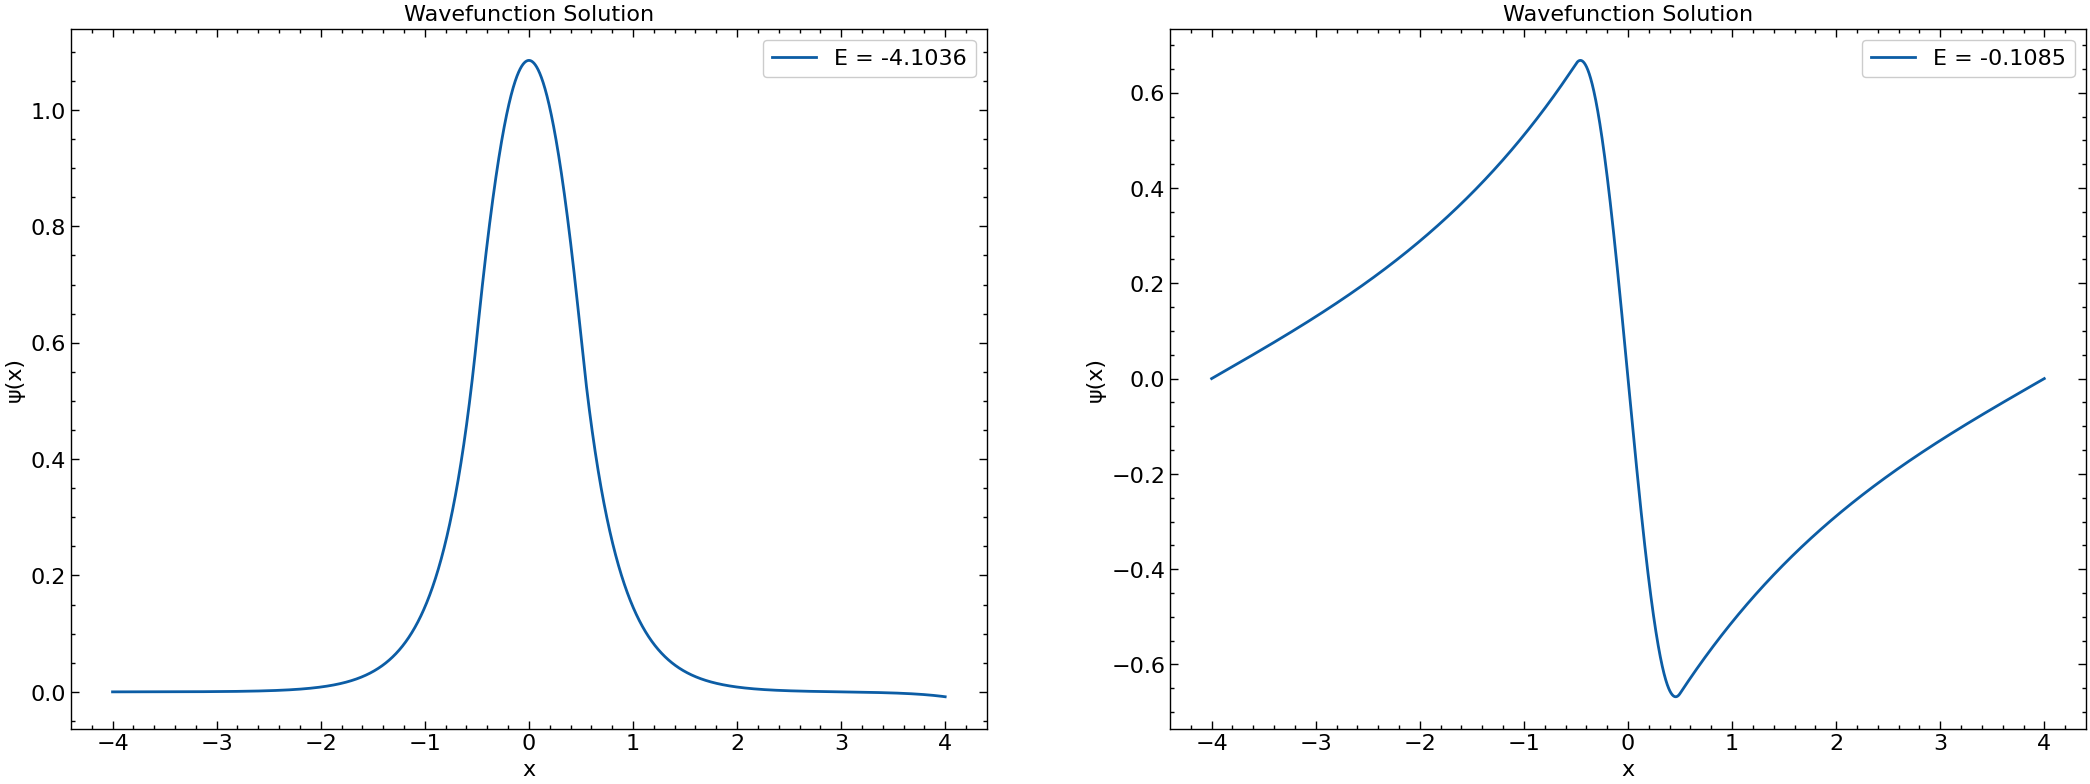

In [18]:
plt.figure(figsize = (26, 20))
for i in range(len(En)):
    plt.subplot(2, 2, i+1)
    # Solve for wavefunction with the found eigenvalue
    x_vals = np.arange(x_range[0], x_range[1], dx)
    y_vals = np.array([0.0, 1.0]) #y_vals have two information \psi and \phi
    psi_vals = []

    for x in x_vals:
        psi_vals.append(y_vals[0])
        y_vals = rk4_step(schrodinger, y_vals, x, dx, En[i])


    # Normalize wavefunction
    psi_vals = np.array(psi_vals)
    Norm = np.sqrt(1/integrate(psi_vals*psi_vals, x_vals))
    psi_vals = Norm*(psi_vals)  #Normalization

    # Plot wavefunction
    plt.plot(x_vals, psi_vals, label=f"E = {En[i]:.4f}")
    plt.xlabel("x")
    plt.ylabel("ψ(x)")
    plt.title("Wavefunction Solution")
    plt.legend()
    plt.grid()
plt.show()

# Double well

In [10]:
# Constants
hbar = 1  # Reduced Planck's constant (in atomic units)
m = 1     # Mass of the particle (in atomic units)

a = 0.5; Vo = 6

# Define the potential function
def potential(x):
    if a  <= abs(x) <= a + 1:
        return -Vo
    else: return 0

# Parameters
x_range = (-6, 6)  # Range for x
dx = 0.001          # Step size
En = []

In [18]:
E1, E2 = -4, -5  # Initial energy guesses

eigen_energy = find_eigenvalue(E1, E2, 1e-6, x_range, dx)
print(f"Eigenvalue found: {eigen_energy:.6f}")

Eigenvalue found: -5.000000


In [16]:
En = [-0.222408]

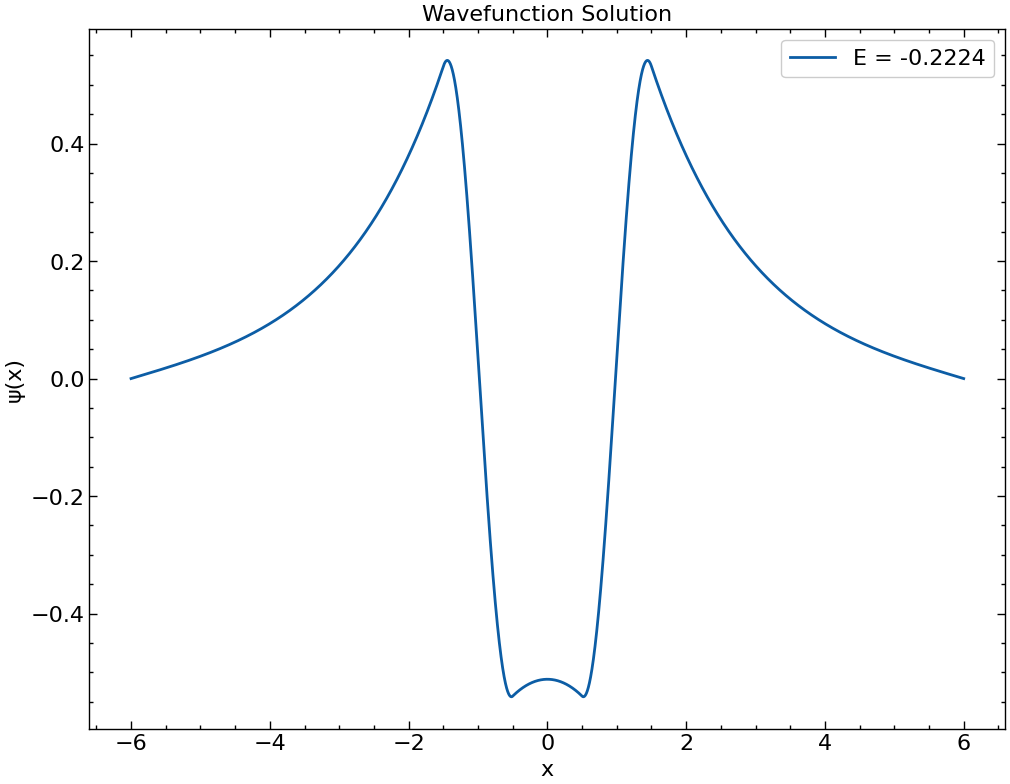

In [17]:
plt.figure(figsize = (26, 20))
for i in range(len(En)):
    plt.subplot(2, 2, i+1)
    # Solve for wavefunction with the found eigenvalue
    x_vals = np.arange(x_range[0], x_range[1], dx)
    y_vals = np.array([0.0, 1.0]) #y_vals have two information \psi and \phi
    psi_vals = []

    for x in x_vals:
        psi_vals.append(y_vals[0])
        y_vals = rk4_step(schrodinger, y_vals, x, dx, En[i])


    # Normalize wavefunction
    psi_vals = np.array(psi_vals)
    Norm = np.sqrt(1/integrate(psi_vals*psi_vals, x_vals))
    psi_vals = Norm*(psi_vals)  #Normalization

    # Plot wavefunction
    plt.plot(x_vals, psi_vals, label=f"E = {En[i]:.4f}")
    plt.xlabel("x")
    plt.ylabel("ψ(x)")
    plt.title("Wavefunction Solution")
    plt.legend()
    plt.grid()
plt.show()